In [36]:
#Make and choose the best model to predict if a person will default on loan

# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from IPython.display import display

# Read student data
default_data = pd.read_csv("Default.csv")
print "default data read successfully!"

default data read successfully!


In [12]:
print np.shape(default_data)

default_data.head()

# What we have to do: 
# 1. separate out default (target vs feature columns)
# 2. turn "student" into a dummy variable

(10000, 4)


,default,student,balance,income
0,0,No,729.526495,44361.62507
1,0,Yes,817.180407,12106.13470
2,0,No,1073.549164,31767.13895
3,0,No,529.250605,35704.49394
4,0,No,785.655883,38463.49588


In [19]:
# Extract feature columns
feature_cols = list(default_data.columns[1:])

# Extract target column 'passed'
target_col = default_data.columns[0] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = default_data[feature_cols]
y_all = default_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['student', 'balance', 'income']

Target column: default

Feature values:
  student      balance       income
0      No   729.526495  44361.62507
1     Yes   817.180407  12106.13470
2      No  1073.549164  31767.13895
3      No   529.250605  35704.49394
4      No   785.655883  38463.49588


In [30]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(X_all, alpha = 0.3, figsize = (14,8), diagonal = 'kde');


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123bcce50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x124da9350>]], dtype=object)

In [21]:
#Change character variables to numeric in order to use in ML algorithms

def preprocess_features(X):
    ''' Preprocesses the default data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col) 
            
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (4 total features):
['student_No', 'student_Yes', 'balance', 'income']


In [16]:
X_all.head()

,student_No,student_Yes,balance,income
0,1.0,0.0,729.526495,44361.62507
1,0.0,1.0,817.180407,12106.13470
2,1.0,0.0,1073.549164,31767.13895
3,1.0,0.0,529.250605,35704.49394
4,1.0,0.0,785.655883,38463.49588


In [31]:
#  Import cross validation from sklearn
from sklearn.cross_validation import train_test_split


#  Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test= train_test_split(X_all, y_all, train_size=0.8, random_state=1)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 8000 samples.
Testing set has 2000 samples.


/Users/jeremy/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [38]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf = clf.fit(X_train, y_train)


In [39]:
pred_probs = clf.predict_proba(X_test)[:,1]
fpr, tpr, thres = roc_curve(y_test, pred_probs)
roc_auc_score(y_test, pred_probs)

0.66013499943240861

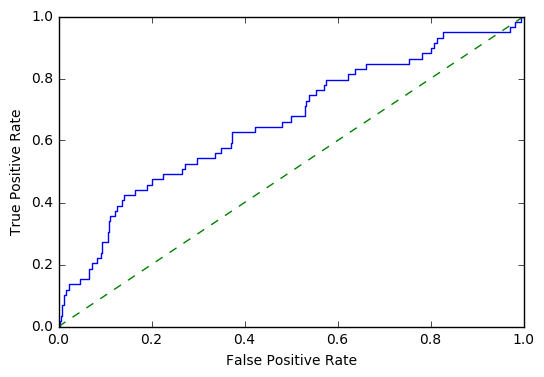

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

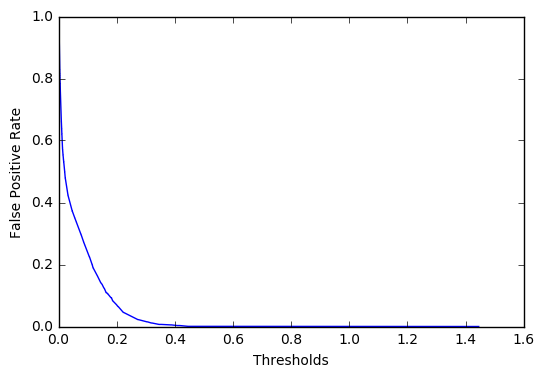

In [41]:
plt.plot(thres, fpr)
plt.xlabel("Thresholds")
plt.ylabel("False Positive Rate")
plt.show();

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
clf2 = GradientBoostingClassifier(random_state=42)
clf2 = clf2.fit(X_train, y_train)

In [43]:
pred_probs = clf2.predict_proba(X_test)[:,1]
fpr, tpr, thres = roc_curve(y_test, pred_probs)
roc_auc_score(y_test, pred_probs)

0.92230110287375888

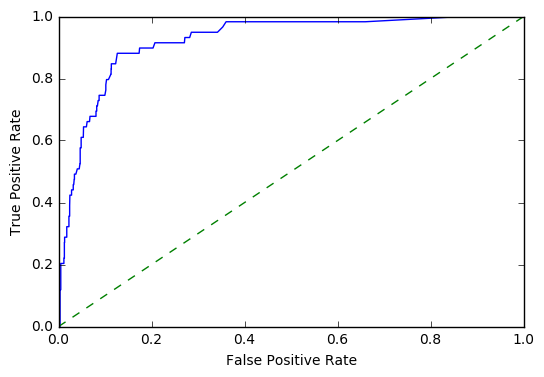

In [44]:
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

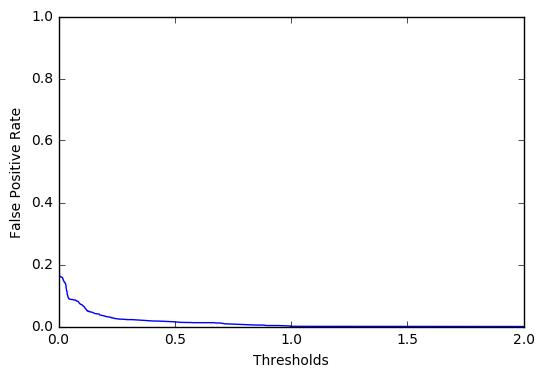

In [45]:
plt.plot(thres, fpr)
plt.xlabel("Thresholds")
plt.ylabel("False Positive Rate")
plt.show();

In [46]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
#Import 'GridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import GradientBoostingClassifier

# Create the parameters list you wish to tune
parameters = [{'C':[0.5,1.0,1.5,100]},{'penalty':['l2','l1']}]

# Initialize the classifier
clf = LogisticRegression(random_state=1)

# Make an f1 scoring function using 'make_scorer' 
#f1_scorer = make_scorer(f1_score, pos_label=1)

# Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring='roc_auc', cv=5)

# Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_



/Users/jeremy/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
pred_probs2 = clf.predict_proba(X_test)[:,1]
fpr2, tpr2, thres2 = roc_curve(y_test, pred_probs2)
roc_auc_score(y_test, pred_probs)

0.92230110287375888

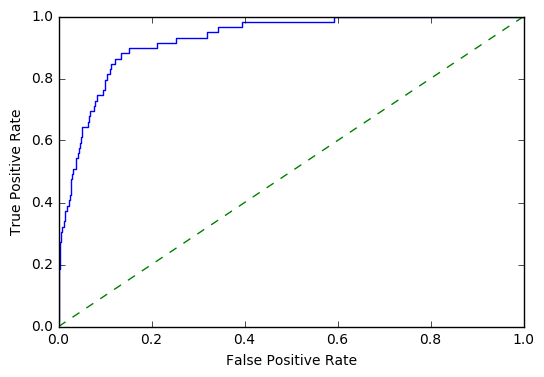

In [49]:
plt.plot(fpr2, tpr2)
plt.plot([0,1], [0,1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [56]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
#Import 'GridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import GradientBoostingClassifier

# Create the parameters list you wish to tune
parameters = [{'max_depth':[2,3,4]},{'n_estimators':[20,50,75,100,150]},{'learning_rate':[.02,.03,.05,.1,.15]}]

# Initialize the classifier
clf = GradientBoostingClassifier(random_state=1)

# Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label=1)

# Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring='roc_auc',cv=5)

# Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_


# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

NameError: name 'predict_labels' is not defined

In [51]:
clf

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.02, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=1,
              subsample=1.0, verbose=0, warm_start=False)

In [52]:
pred_probs = clf.predict_proba(X_test)[:,1]
fpr, tpr, thres = roc_curve(y_test, pred_probs)
roc_auc_score(y_test, pred_probs)

0.92752294379098676

In [53]:
pred_probs

array([ 0.00662935,  0.00768095,  0.00662935, ...,  0.03580909,
        0.00768095,  0.00662935])

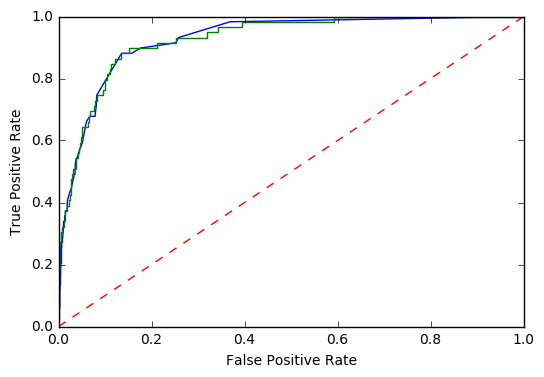

In [54]:
   
plt.plot(fpr, tpr)
plt.plot(fpr2,tpr2)
plt.plot([0,1], [0,1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

